In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras.models import Sequential
import os
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
path = 'C:\\Users\\User\\Desktop\\Data_Science\\TimeSeries\\Weather'

In [9]:
train_path = os.path.join(path, 'DailyDelhiClimateTrain.csv')

In [11]:
df_train = pd.read_csv(train_path)
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


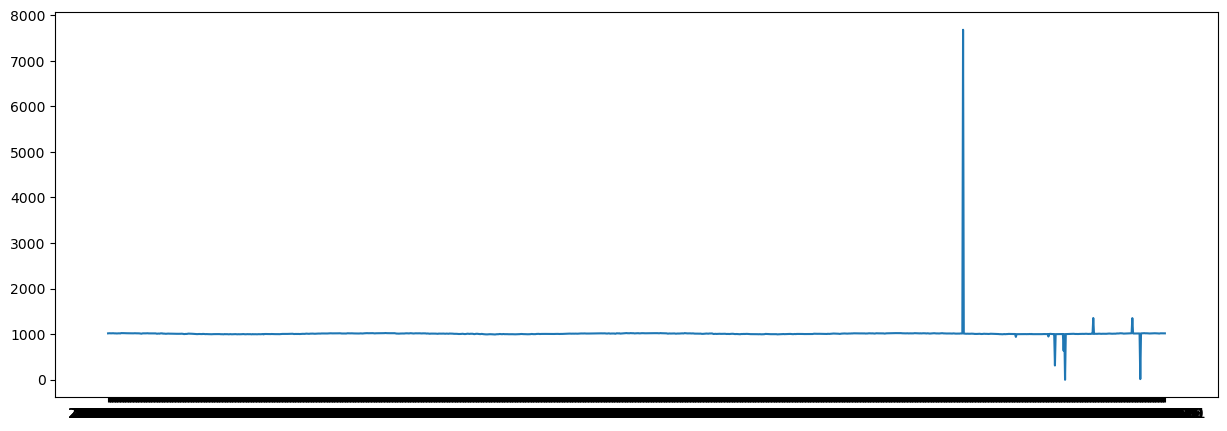

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df_train['date'], df_train['meanpressure'])
plt.show()

In [15]:
print(np.percentile(df_train['meanpressure'].values, 99.8))
print(np.percentile(df_train['meanpressure'].values, 0.215))

1048.5291111111028
676.833125


In [27]:
df_train_fin = df_train.copy()

In [33]:
for i in df_train_fin[(df_train_fin['meanpressure'] < 980.0) | (df_train_fin['meanpressure'] > 1048.5)].index:
  df_train_fin.iloc[i, 4] = (df_train_fin.iloc[i-1, 4] + df_train_fin.iloc[i-2, 4]) / 2

df_train_fin['meanpressure'].min()

991.375

In [39]:
df_train_fin_upd = df_train_fin.drop(columns = ['date'])

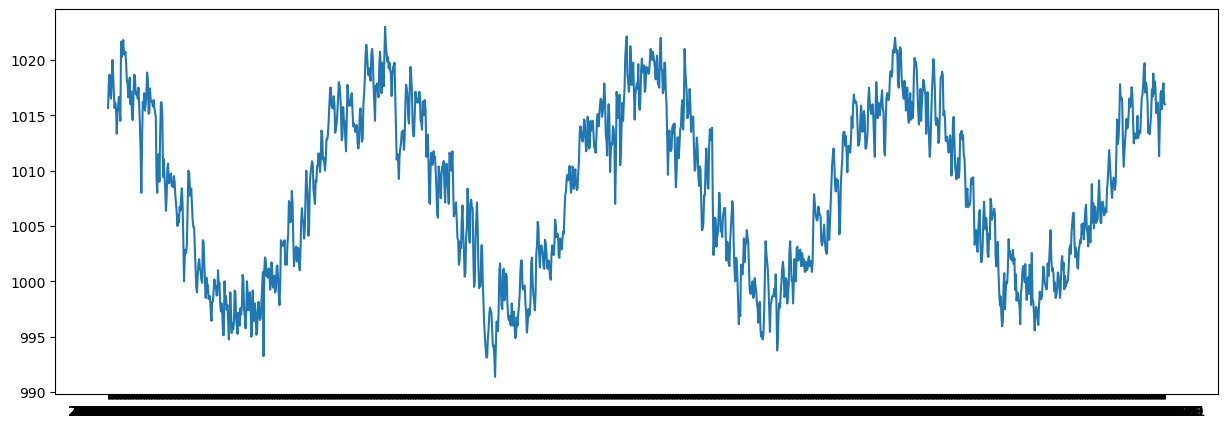

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df_train_fin['date'], df_train_fin['meanpressure'])
plt.show()

In [37]:
def create_sequence(x, y, n = 12):
    x_seq = []
    y_seq = []
    y = x[:, :y+1]
    for i in range(len(x) - n):
        x_seq.append(x[i:i+n])
        y_seq.append(y[i+n])

    return np.array(x_seq), np.array(y_seq)

In [41]:
df_train_st, df_test_st = train_test_split(df_train_fin_upd, test_size = 0.2, shuffle = False)

In [112]:
scaler = StandardScaler()

df_train_sc = scaler.fit_transform(df_train_st)
df_test_sc = scaler.transform(df_test_st)

In [75]:
df_train_sc.shape

(1169, 4)

In [45]:
x_train, y_train = create_sequence(df_train_sc, 4)
x_test, y_test = create_sequence(df_test_sc, 4)

In [57]:
model = Sequential()
model.add(GRU(units = 50, input_shape = (12, 4),  return_sequences = True))
model.add(GRU(units = 25))
model.add(Dense(4))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.compile(optimizer = 'adam', loss = 'mse')

In [61]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.7680
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3261
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2980
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3752
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3163
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3286
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3230
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2693
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2962
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2735
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2717 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2863
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2786
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2735
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2483
Epoch 16/

In [63]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [73]:
train_predictions.shape

(1157, 4)

In [77]:
df_train_inv = np.zeros((df_train_sc.shape[0] - 12, 4))
df_train_inv[:, 0] = train_predictions[:, 0].flatten()
df_train_inv[:, 1] = train_predictions[:, 1].flatten()
df_train_inv[:, 2] = train_predictions[:, 2].flatten()
df_train_inv[:, 3] = train_predictions[:, 3].flatten()
train_predictions_rl = scaler.inverse_transform(df_train_inv)

df_test_inv = np.zeros((df_test_sc.shape[0] - 12, 4))
df_test_inv[:, 0] = test_predictions[:, 0].flatten()
df_test_inv[:, 1] = test_predictions[:, 1].flatten()
df_test_inv[:, 2] = test_predictions[:, 2].flatten()
df_test_inv[:, 3] = test_predictions[:, 3].flatten()
test_predictions_rl = scaler.inverse_transform(df_test_inv)

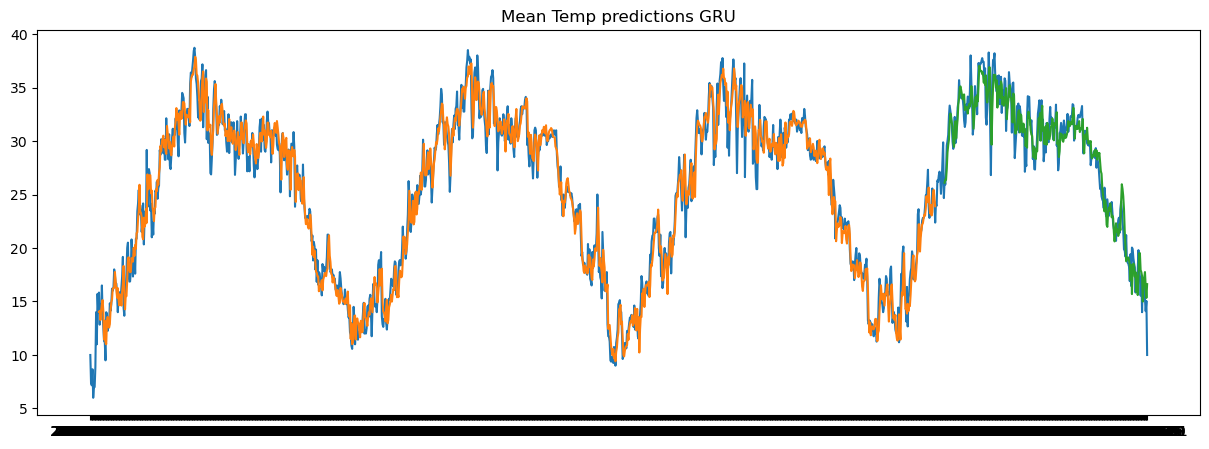

In [83]:
plt.figure(figsize = (15, 5))
plt.plot(df_train_fin['date'], df_train_fin['meantemp'], label = 'real')
plt.plot(df_train_fin['date'][12:1169],train_predictions_rl[:, 0], label = 'train_pred')
plt.plot(df_train_fin['date'][1181:], test_predictions_rl[:, 0], label = 'test_predictions')

plt.title('Mean Temp predictions GRU')
plt.show()

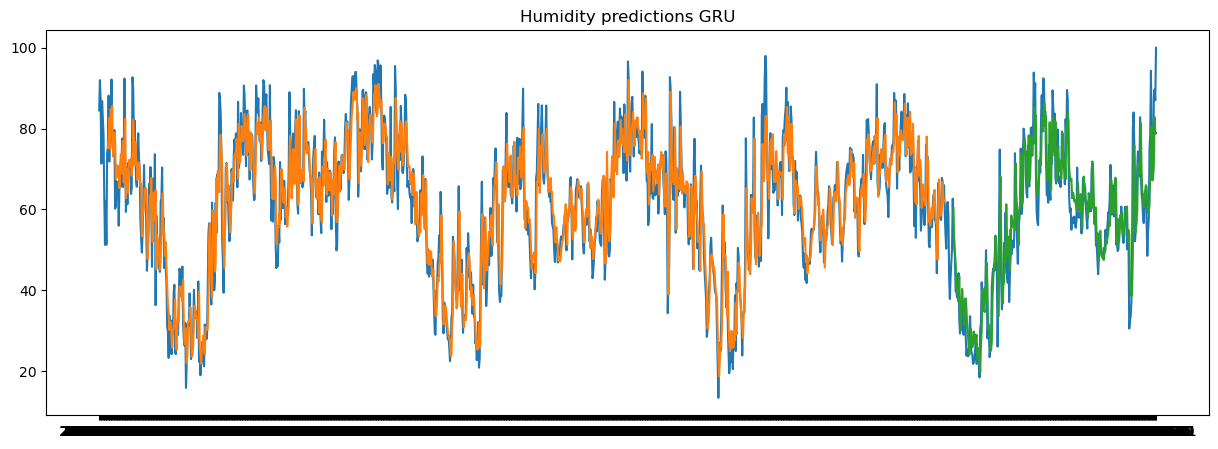

In [85]:
plt.figure(figsize = (15, 5))
plt.plot(df_train_fin['date'], df_train_fin['humidity'], label = 'real')
plt.plot(df_train_fin['date'][12:1169],train_predictions_rl[:, 1], label = 'train_pred')
plt.plot(df_train_fin['date'][1181:], test_predictions_rl[:, 1], label = 'test_predictions')

plt.title('Humidity predictions GRU')
plt.show()

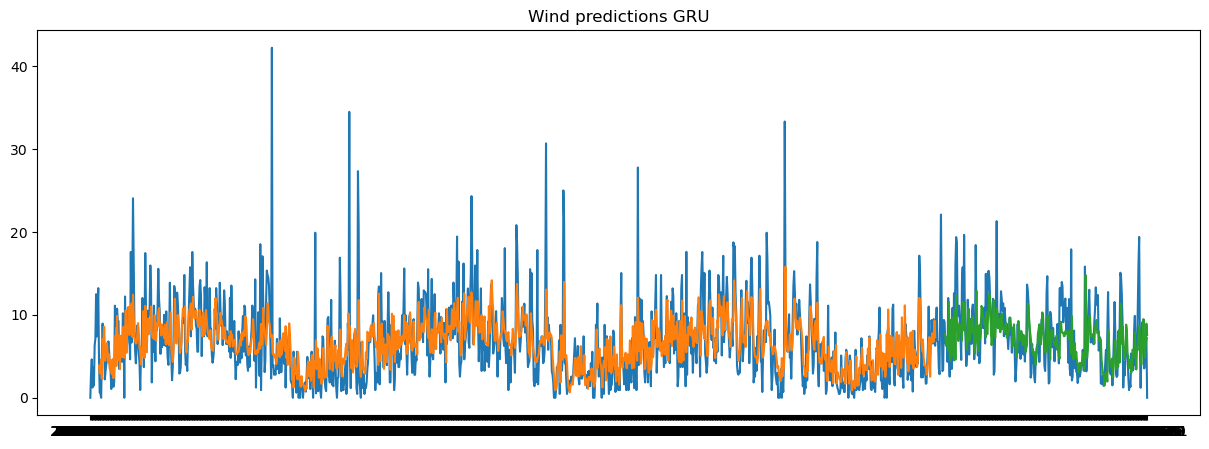

In [87]:
plt.figure(figsize = (15, 5))
plt.plot(df_train_fin['date'], df_train_fin['wind_speed'], label = 'real')
plt.plot(df_train_fin['date'][12:1169],train_predictions_rl[:, 2], label = 'train_pred')
plt.plot(df_train_fin['date'][1181:], test_predictions_rl[:, 2], label = 'test_predictions')

plt.title('Wind predictions GRU')
plt.show()

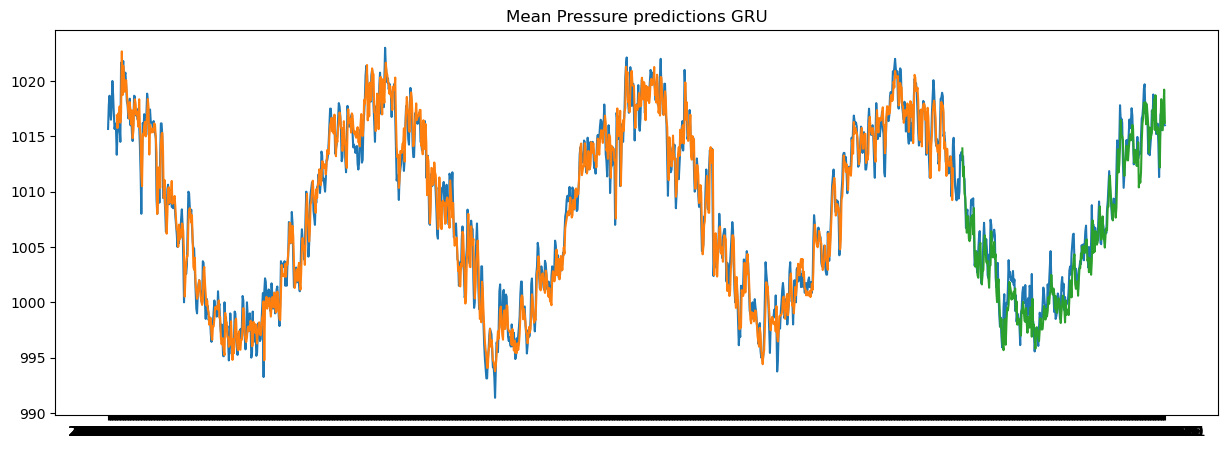

In [89]:
plt.figure(figsize = (15, 5))
plt.plot(df_train_fin['date'], df_train_fin['meanpressure'], label = 'real')
plt.plot(df_train_fin['date'][12:1169],train_predictions_rl[:, 3], label = 'train_pred')
plt.plot(df_train_fin['date'][1181:], test_predictions_rl[:, 3], label = 'test_predictions')

plt.title('Mean Pressure predictions GRU')
plt.show()

## Test validation

In [92]:
test_path = os.path.join(path, 'DailyDelhiClimateTest.csv')

In [96]:
df_2 = pd.read_csv(test_path)
df_2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [100]:
df_test = df_2.drop(columns = ['date'])

In [102]:
df_test = df_test.drop(0)

In [118]:
df_to_merge = df_train_fin_upd[-12:]
df_to_merge

,meantemp,humidity,wind_speed,meanpressure
1450,18.050000,54.300000,19.404762,1015.619048
1451,17.285714,57.857143,6.180952,1016.142857
1452,15.550000,74.700000,1.205000,1014.250000
1453,17.318182,78.636364,5.236364,1011.318182
1454,14.000000,94.300000,9.085000,1014.350000
1455,17.142857,74.857143,8.784211,1016.952381
1456,16.850000,67.550000,8.335000,1017.200000
1457,17.217391,68.043478,3.547826,1015.565217
1458,15.238095,87.857143,6.000000,1016.904762
1459,14.095238,89.666667,6.266667,1017.904762


In [120]:
df_test_2_fin = pd.concat([df_to_merge, df_test], axis = 0 )

In [122]:
df_test_2_fin

,meantemp,humidity,wind_speed,meanpressure
1450,18.050000,54.300000,19.404762,1015.619048
1451,17.285714,57.857143,6.180952,1016.142857
1452,15.550000,74.700000,1.205000,1014.250000
1453,17.318182,78.636364,5.236364,1011.318182
1454,14.000000,94.300000,9.085000,1014.350000
...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000
110,34.250000,39.375000,6.962500,999.875000
111,32.900000,40.900000,8.890000,1001.600000
112,32.875000,27.500000,9.962500,1002.125000


In [124]:
df_test_2_sc = scaler.transform(df_test_2_fin)

In [126]:
x_test_2, y_test_2 = create_sequence(df_test_2_sc, 4)

In [128]:
test_2_predictions = model.predict(x_test_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [130]:
df_test_inv_2 = np.zeros((df_test_2_sc.shape[0] - 12, 4))
df_test_inv_2[:, 0] = test_2_predictions[:, 0].flatten()
df_test_inv_2[:, 1] = test_2_predictions[:, 1].flatten()
df_test_inv_2[:, 2] = test_2_predictions[:, 2].flatten()
df_test_inv_2[:, 3] = test_2_predictions[:, 3].flatten()
test_predictions_rl_2 = scaler.inverse_transform(df_test_inv_2)

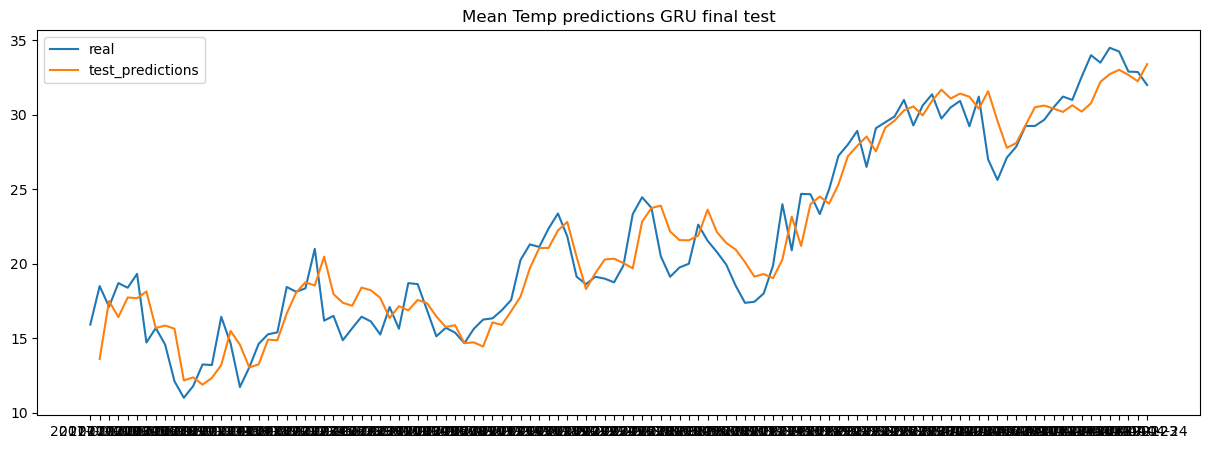

In [136]:
plt.figure(figsize = (15, 5))
plt.plot(df_2['date'], df_2['meantemp'], label = 'real')
plt.plot(df_2['date'][1:], test_predictions_rl_2[:, 0], label = 'test_predictions')

plt.legend()
plt.title('Mean Temp predictions GRU final test')
plt.show()

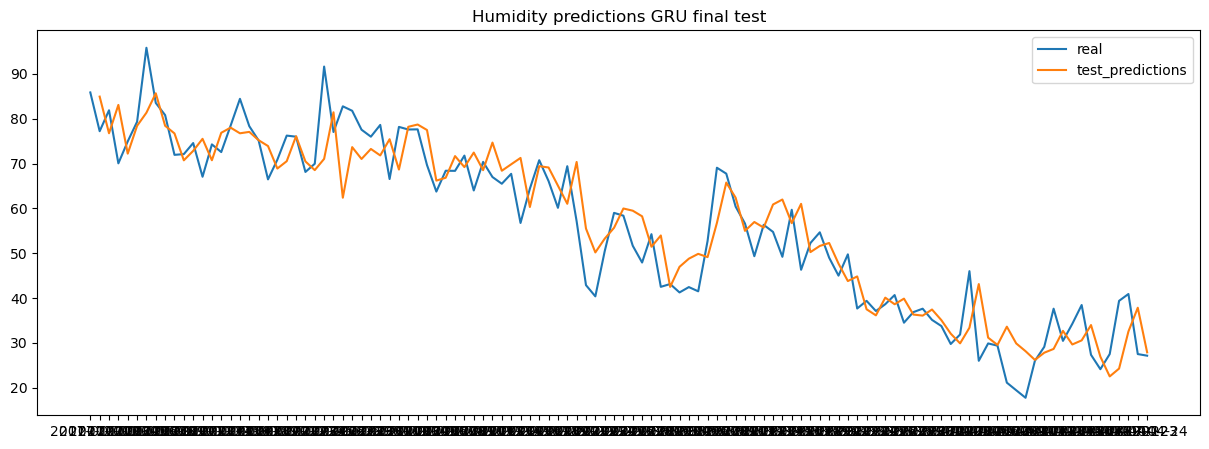

In [138]:
plt.figure(figsize = (15, 5))
plt.plot(df_2['date'], df_2['humidity'], label = 'real')
plt.plot(df_2['date'][1:], test_predictions_rl_2[:, 1], label = 'test_predictions')

plt.legend()
plt.title('Humidity predictions GRU final test')
plt.show()

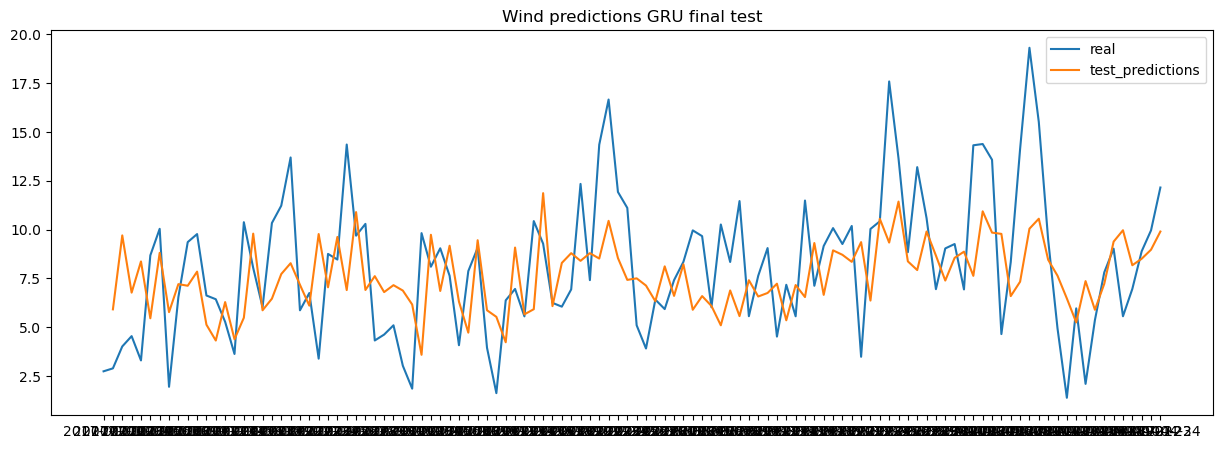

In [142]:
plt.figure(figsize = (15, 5))
plt.plot(df_2['date'], df_2['wind_speed'], label = 'real')
plt.plot(df_2['date'][1:], test_predictions_rl_2[:, 2], label = 'test_predictions')

plt.legend()
plt.title('Wind predictions GRU final test')
plt.show()

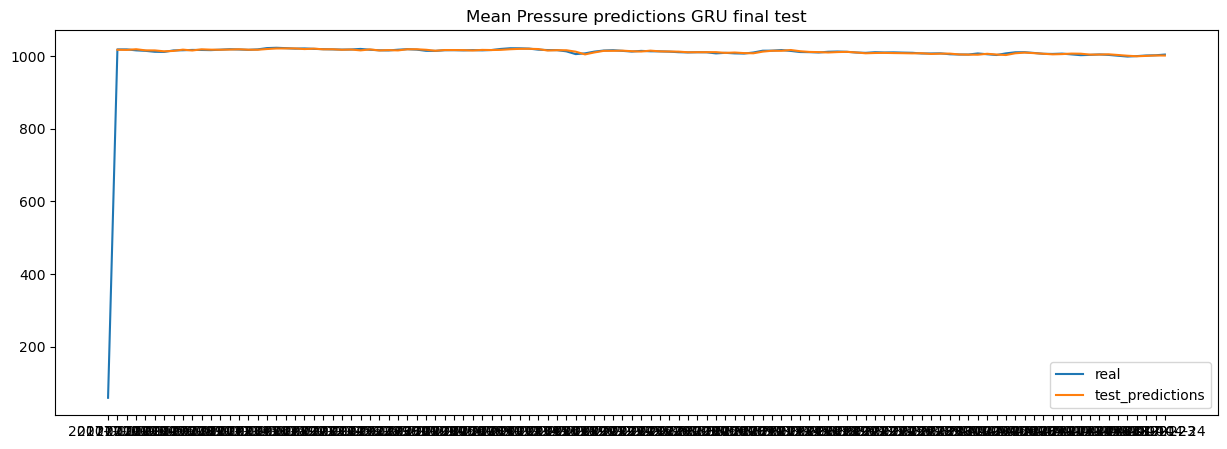

In [144]:
plt.figure(figsize = (15, 5))
plt.plot(df_2['date'], df_2['meanpressure'], label = 'real')
plt.plot(df_2['date'][1:], test_predictions_rl_2[:, 3], label = 'test_predictions')

plt.legend()
plt.title('Mean Pressure predictions GRU final test')
plt.show()